# Submitted by
 - Name: Subham Das

# Problem Definition
 - Find out a Dataset, and compare at least two different algorithms and choose the best one
 - Use suitable Data Preprocessing and Feature Selection/Engineering Methods
 - Fine tune the model and hyper parameters and Finalise the Model
 - Make the model deployment-ready by giving User-Input provision

# Objective
 - I choose Adult dataset.
 - The objective of this dataset is to predict whwther income exceeds 50,000 dollars per year based on census data. So, we will use the logistic regression and decision tree algorithm to predict if an individual earns more than $50k annually and is therefore elligible for the new credit card. 

# Approach
 - Import all necessry libraries.
 - Works on the dataset.
 - Doing necessary EDA parts for visualizations.
 - Using suitable Data Preprocessing and Feature Selection/Engineering Methods.
 - Using fine tune model and hyperparameter and also using different algorithm like LogisticRegression, DecisionTres, RandomForest, PCA we have to check the best model.
 - After making best model, by giving user input predict the target variable.

# Code

In [102]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

In [103]:
data = pd.read_csv("D:/adult.csv")
data.head()  #showing the first few rows of the dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [105]:
# salary dataset info to find columns and count of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [106]:
#replacing some special character columns names with proper names 
data.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [107]:
data.describe()

,age,fnlwgt,educational-num,capital gain,capital loss,hours per week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [108]:
print(f'Dataset shape is{data.shape}')

Dataset shape is(48842, 15)


In [109]:
#Finding the special characters in the data frame 
data.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

 - As we can see there are 857 null values in country column and for our model that is less important, so we are dropping the Column.

In [110]:
data = data.drop(['country'], axis = 1)

### Removing Null values

In [111]:
# code will replace the special character to nan and then drop the rows 
data = data.replace('?',np.nan)

#dropping the NaN rows now 
data.dropna(how='any',inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [112]:
data.nunique()

age                   74
workclass              7
fnlwgt             27035
education             16
educational-num       16
marital                7
occupation            14
relationship           6
race                   5
gender                 2
capital gain         121
capital loss          97
hours per week        96
income                 2
dtype: int64

### Value Count Function

In [113]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

In [114]:
data['education'].value_counts()

HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

In [115]:
data['marital'].value_counts()

Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: marital, dtype: int64

In [116]:
data['relationship'].value_counts()

Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: relationship, dtype: int64

In [117]:
data['gender'].value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

In [118]:
data['race'].value_counts()

White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: race, dtype: int64

In [119]:
data['income'].value_counts()

<=50K    34611
>50K     11422
Name: income, dtype: int64

### Checking if the dataset is balanced or not!!

<AxesSubplot:xlabel='income', ylabel='count'>

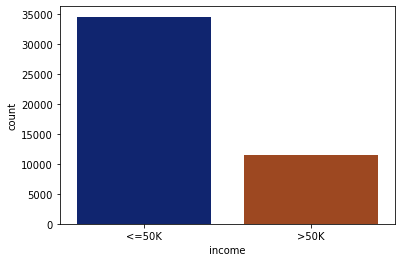

In [120]:
# Is dataset balanced?
sns.countplot(x='income',palette='dark',data=data)

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

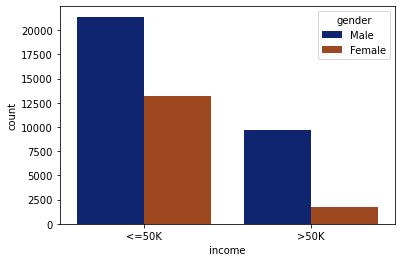

In [121]:
sns.countplot(data['income'],palette='dark',hue='gender',data=data)

 - Females are underrepresented. This could be possibly caused by census bias.

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

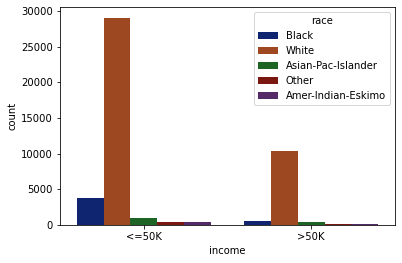

In [122]:
sns.countplot(data['income'],palette='dark',hue='race',data=data)

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

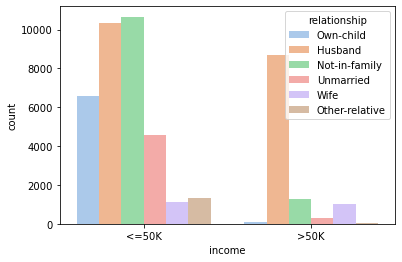

In [123]:
sns.countplot(data['income'],palette='pastel',hue='relationship',data=data)

### Feature Engineering

In [124]:
# education Category
data.education = data.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',
                                        '11th','12th'], 'school')
data.education = data.education.replace(['HS-grad'], 'high-school')
data.education = data.education.replace(['Assoc-voc','Assoc-acdm','Prof-school',
                                        'Some-college'], 'higher-school')

In [125]:
data['education'].value_counts()

high-school      14972
higher-school    14353
Bachelors         7772
school            5770
Masters           2590
Doctorate          576
Name: education, dtype: int64

In [126]:
data['workclass'] = data['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'govt')
data['workclass'] = data['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'self-employed')

In [127]:
data['workclass'].value_counts()

Private          33906
govt              6549
self-employed     5557
Without-pay         21
Name: workclass, dtype: int64

In [128]:
# marital status
data['marital'] = data['marital'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
data['marital'] = data['marital'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [129]:
data['marital'].value_counts()

married          21483
Never-married    14875
other             9675
Name: marital, dtype: int64

In [130]:
# occupation status
data.occupation=data.occupation.replace(['Adm-clerical','Exec-managerial'],'white-collar')
data.occupation=data.occupation.replace(['Craft-repair','Farming-fishing','Handlers-cleaners','Machine-op-inspct','Transport-moving'],'blue-collar')
data.occupation=data.occupation.replace(['Other-service','Priv-house-serv','Protective-serv','Tech-support'],'service')
data.occupation=data.occupation.replace('Prof-specialty','professional')
data.occupation=data.occupation.replace('Armed-Forces','other')

In [131]:
data['occupation'].value_counts()

blue-collar     15051
white-collar    11697
service          7594
professional     6172
Sales            5504
other              15
Name: occupation, dtype: int64

### Correlation

In [132]:
data.corr()

,age,fnlwgt,educational-num,capital gain,capital loss,hours per week
age,1.000000,-0.075757,0.037566,0.079907,0.059441,0.102185
fnlwgt,-0.075757,1.000000,-0.040167,-0.004246,-0.004363,-0.018325
educational-num,0.037566,-0.040167,1.000000,0.126382,0.081463,0.145151
capital gain,0.079907,-0.004246,0.126382,1.000000,-0.032142,0.082977
capital loss,0.059441,-0.004363,0.081463,-0.032142,1.000000,0.055545
hours per week,0.102185,-0.018325,0.145151,0.082977,0.055545,1.000000


<AxesSubplot:>

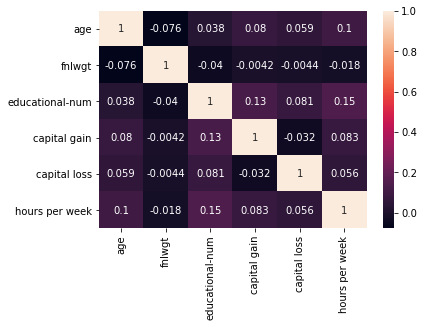

In [133]:
sns.heatmap(data.corr(),annot=True)

### Visualization

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

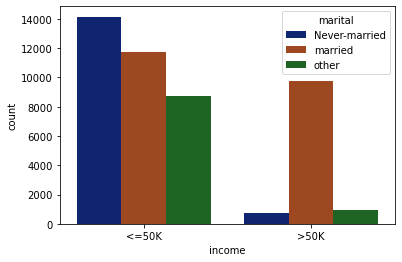

In [134]:
sns.countplot(data['income'],palette='dark',hue='marital',data=data)

- For those who are married, nearly half of them are making greater than $50,000 a year.

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

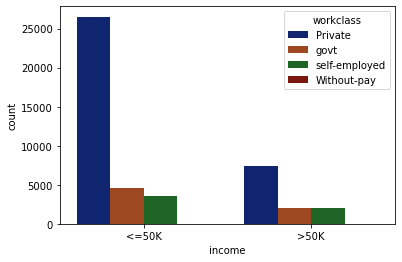

In [135]:
sns.countplot(data['income'],palette='dark',hue='workclass',data=data)

 - Those who are self employed have the highest tendency of making greater than $50,000 a year.

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

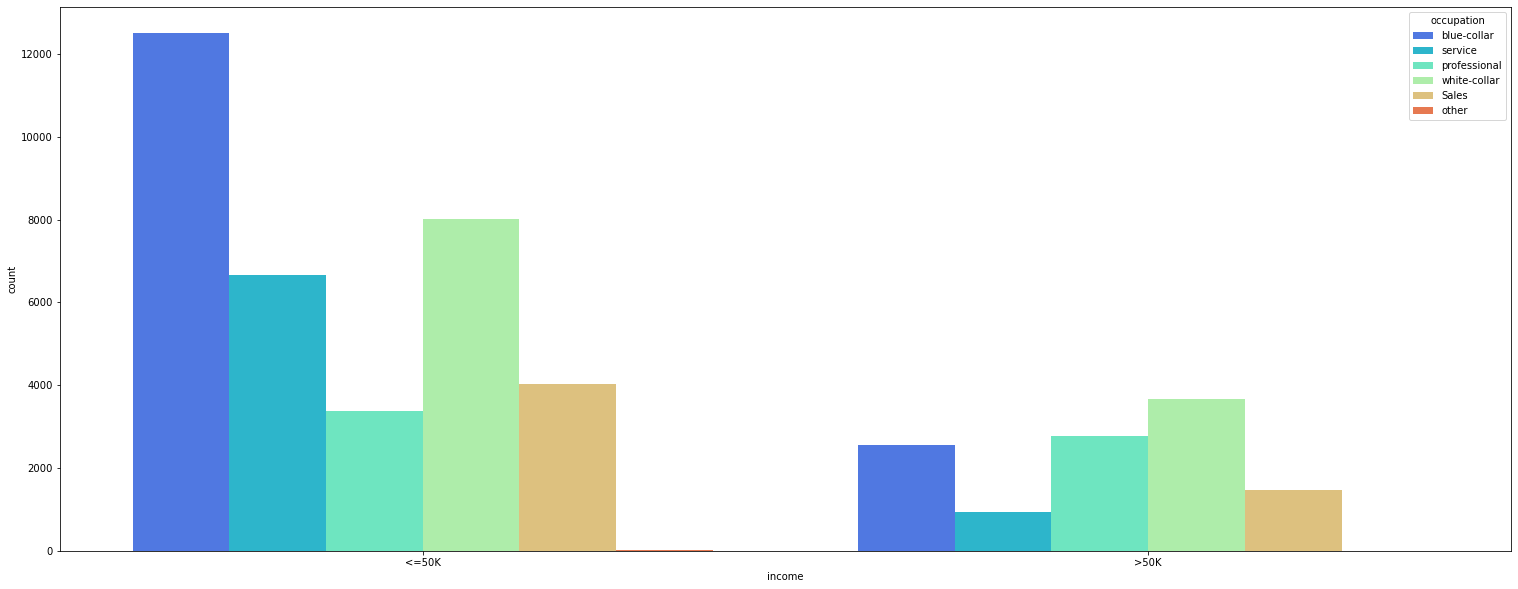

In [136]:
plt.figure(figsize = [26,10])
sns.countplot(data['income'],palette='rainbow',hue='occupation',data=data)

- It is noticed that income varies greatly across different occupations. Nearly half of Professional occupation makes greater than $50,000 a year, while that percentage of Service occupation is very less.

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='education', ylabel='count'>

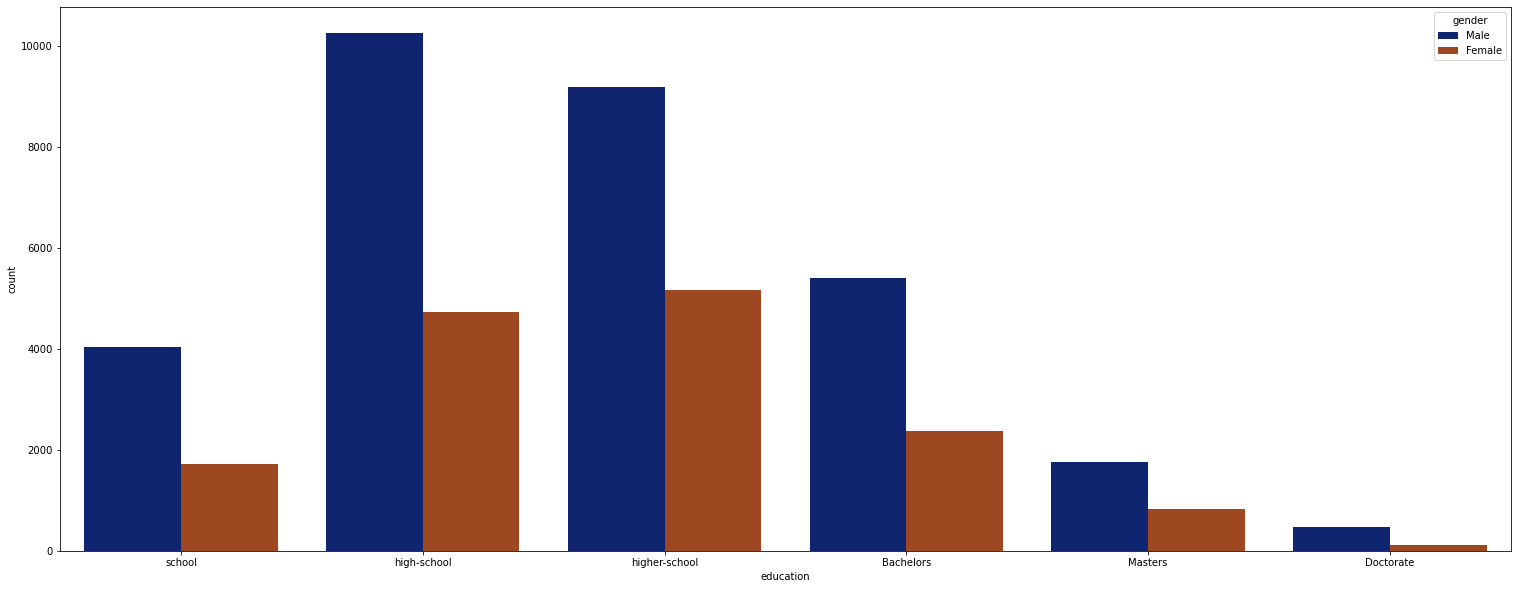

In [137]:
plt.figure(figsize = [26,10])
sns.countplot(data['education'],palette='dark',hue='gender',data=data)

### Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'capital gain'}>,
        <AxesSubplot:title={'center':'capital loss'}>,
        <AxesSubplot:title={'center':'hours per week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

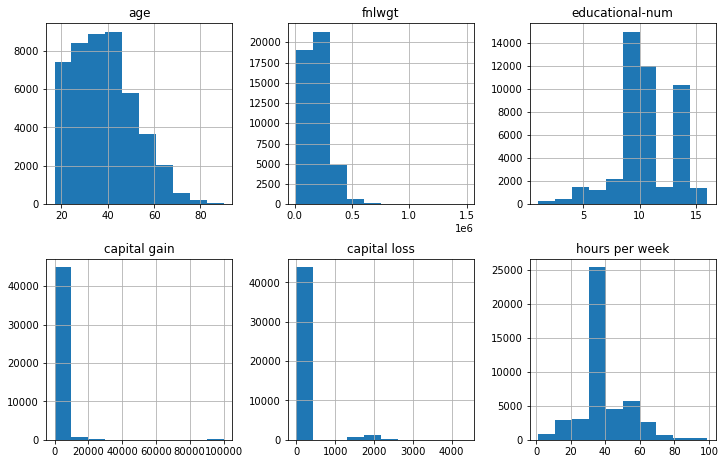

In [138]:
data.hist(figsize=(12,12),layout=(3,3),sharex=False)

### Boxplot

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours per week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

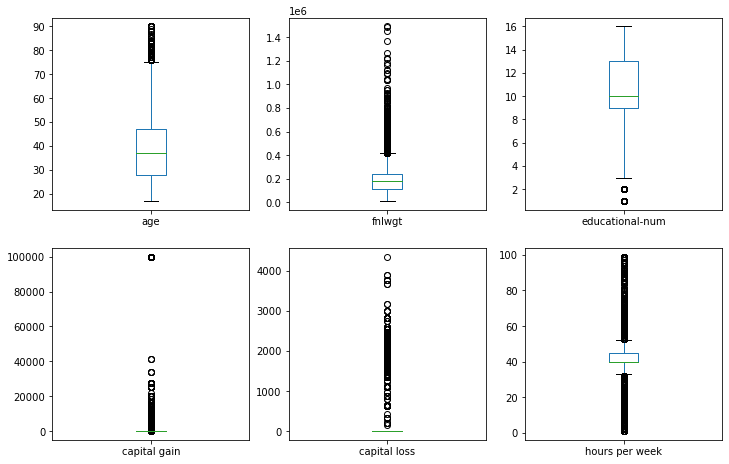

In [139]:
# check outliers
data.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

### Plotly

In [140]:
px.pie(data,values='educational-num',names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

- For simplicity of this analysis, the weighting factor is discarded. Educational-num can represent by the highest education level completed. Role in the family can be assessed from gender and marital status. Thus, the following 3 variables are deleted education-num, relationship, and fnlwgt.
- In histoplot observations have zero capital-gain and/or capital-loss. Similarly, there native-country displays high skewness as most observations are from United States. Therefore, these three variables are excluded from the analysis as well.

### Feature Scaling

In [141]:
new_data = data.copy()

In [142]:
us_df = new_data.drop(['fnlwgt','educational-num','race','relationship','capital gain','capital loss',
                       'income'],axis=1)

In [143]:
new_df = new_data.drop(['fnlwgt','educational-num','race','relationship','capital gain','capital loss']
                       ,axis = 1)
new_df.head()

,age,workclass,education,marital,occupation,gender,hours per week,income
0,25,Private,school,Never-married,blue-collar,Male,40,<=50K
1,38,Private,high-school,married,blue-collar,Male,50,<=50K
2,28,govt,higher-school,married,service,Male,40,>50K
3,44,Private,higher-school,married,blue-collar,Male,40,>50K
5,34,Private,school,Never-married,service,Male,30,<=50K


In [144]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   education       46033 non-null  object
 3   marital         46033 non-null  object
 4   occupation      46033 non-null  object
 5   gender          46033 non-null  object
 6   hours per week  46033 non-null  int64 
 7   income          46033 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.2+ MB


In [145]:
le = LabelEncoder()
for col in new_df.columns:
    if new_df[col].dtypes =='object':
        new_df[col] = le.fit_transform(new_df[col])
new_df.head()

,age,workclass,education,marital,occupation,gender,hours per week,income
0,25,0,5,0,1,1,40,0
1,38,0,3,1,1,1,50,0
2,28,2,4,1,4,1,40,1
3,44,0,4,1,1,1,40,1
5,34,0,5,0,4,1,30,0


### Standardizing and Train-Test Splitting

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(new_df.drop('income', axis=1))
X = sc.fit_transform(new_df.drop('income', axis = 1))
y = new_df.income

In [147]:
# Train-Test split: 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Creating Model

In [148]:
model_name=[]
training_data_accuracy=[]
testing_data_accuracy=[]
model_accuracy=[]

### Logistic Regression

In [149]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_LR = lr.predict(X_test)
print("Accuracy on training data using Logistic Regression: ",lr.score(X_train,y_train))
print("Accuracy on testing data using Logistic Regression: ",lr.score(X_test,y_test))

Accuracy on training data using Logistic Regression:  0.7788494960027806
Accuracy on testing data using Logistic Regression:  0.7739160656877226


In [150]:
confusion_matrix(y_test, y_pred_LR)

array([[8029,  582],
       [2020,  878]], dtype=int64)

In [151]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8611
           1       0.60      0.30      0.40      2898

    accuracy                           0.77     11509
   macro avg       0.70      0.62      0.63     11509
weighted avg       0.75      0.77      0.75     11509



In [152]:
print("Accuracy score of that model in LogisticRegression is: ",accuracy_score(y_test, y_pred_LR))

Accuracy score of that model in LogisticRegression is:  0.7739160656877226


In [153]:
model_name.append("Logistic Regression")
training_data_accuracy.append(lr.score(X_train,y_train))
testing_data_accuracy.append(lr.score(X_test,y_test))
model_accuracy.append(accuracy_score(y_test, y_pred_LR))

### Random Forest Classifier

In [154]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Accuracy on training data using RandomForest Classifier: ",rf_classifier.score(X_train, y_train))
print("Accuracy on testing data using RandomForest Classifier: ",rf_classifier.score(X_test, y_test))

Accuracy on training data using RandomForest Classifier:  0.9279341907079134
Accuracy on testing data using RandomForest Classifier:  0.7994612911634373


In [155]:
confusion_matrix(y_test, y_pred_rf)

array([[7662,  949],
       [1359, 1539]], dtype=int64)

In [156]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8611
           1       0.62      0.53      0.57      2898

    accuracy                           0.80     11509
   macro avg       0.73      0.71      0.72     11509
weighted avg       0.79      0.80      0.79     11509



In [157]:
print("Accuracy score of that model in RandomForestClassifier is: ",accuracy_score(y_test, y_pred_rf))

Accuracy score of that model in RandomForestClassifier is:  0.7994612911634373


### Fine-tuning the model

In [55]:
params = {'max_depth':[3,5,10,None],
       'n_estimators':[10,100,200,300,400,500],
       'max_features':[1,2,3,4,5,6,7],
       'criterion':['gini','entropy'],
       'bootstrap':[True, False],
       'min_samples_leaf':[1,2,3,4],
         }

In [56]:
rf_cl = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_cl, param_distributions = params, 
                                   scoring = 'roc_auc', n_jobs = 1, verbose = 0, 
                                   random_state = None)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [57]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 3,
 'max_features': 6,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

In [58]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=6,
                       min_samples_leaf=3, n_estimators=300)

In [158]:
rf_cl = RandomForestClassifier(n_estimators=300, min_samples_leaf=3,
                                        max_features=6, max_depth= 5,
                                        criterion= 'entropy', bootstrap= True, 
                                       random_state = 42)
rf_cl.fit(X_train, y_train)
y_pred = rf_cl.predict(X_test)
print("Accuracy on training data using RandomForest Classifier: ",rf_cl.score(X_train, y_train))
print("Accuracy on testing data using RandomForest Classifier: ",rf_cl.score(X_test, y_test))

Accuracy on training data using RandomForest Classifier:  0.8100162206001622
Accuracy on testing data using RandomForest Classifier:  0.8078894777999827


In [159]:
confusion_matrix(y_test, y_pred)

array([[8221,  390],
       [1821, 1077]], dtype=int64)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8611
           1       0.73      0.37      0.49      2898

    accuracy                           0.81     11509
   macro avg       0.78      0.66      0.69     11509
weighted avg       0.80      0.81      0.78     11509



In [161]:
print("Accuracy score of that model in RandomForestClassifier is: ",accuracy_score(y_test, y_pred))

Accuracy score of that model in RandomForestClassifier is:  0.8078894777999827


In [162]:
model_name.append("Random Forest after fine-tuning")
training_data_accuracy.append(rf_cl.score(X_train, y_train))
testing_data_accuracy.append(rf_cl.score(X_test, y_test))
model_accuracy.append(accuracy_score(y_test, y_pred))

### Decision Tree Classifier

In [163]:
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 42, max_features = 6, 
                               min_samples_leaf = 3,
                              criterion = 'entropy')
dtree.fit(X_train, y_train)
y_pred_DT = dtree.predict(X_test)
print("Accuracy on training data using Decision Tree Classifier: ",dtree.score(X_train, y_train))
print("Accuracy on testing data using Decision Tree Classifier: ",dtree.score(X_test, y_test))

Accuracy on training data using Decision Tree Classifier:  0.8100741513150272
Accuracy on testing data using Decision Tree Classifier:  0.8064992614475628


In [164]:
confusion_matrix(y_test, y_pred_DT)

array([[8234,  377],
       [1850, 1048]], dtype=int64)

In [165]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      8611
           1       0.74      0.36      0.48      2898

    accuracy                           0.81     11509
   macro avg       0.78      0.66      0.68     11509
weighted avg       0.80      0.81      0.78     11509



In [166]:
print("Accuracy score of that model in DecisionTreeClassifier is: ",accuracy_score(y_test, y_pred_DT))

Accuracy score of that model in DecisionTreeClassifier is:  0.8064992614475628


In [167]:
model_name.append("Decision Tree Classifier")
training_data_accuracy.append(dtree.score(X_train, y_train))
testing_data_accuracy.append(dtree.score(X_test, y_test))
model_accuracy.append(accuracy_score(y_test, y_pred_DT))

### PCA

In [168]:
principal_component_analysis = PCA(n_components = 3)
results = principal_component_analysis.fit(X)
results_transformed = results.transform(X)

In [169]:
pca_dataframe = pd.DataFrame(data = results_transformed)
pca_dataframe

,0,1,2
0,-1.615909,-1.547512,-0.672646
1,0.228618,-1.208486,-0.280552
2,0.083396,-0.139584,0.283389
3,0.096458,-0.902683,-1.083858
4,-1.484303,-0.196847,-0.450523
...,...,...,...
46028,-1.156323,1.308959,-0.361141
46029,0.019133,-0.900042,-0.562204
46030,1.174344,2.361274,-0.727660
46031,-2.117775,0.363486,0.627701


In [170]:
dtc=DecisionTreeClassifier(max_depth = 5, random_state = 42, max_features = 3, 
                               min_samples_leaf = 3,
                              criterion = 'entropy')
X_train, X_test, y_train, y_test = train_test_split(pca_dataframe,y)
model_dtc=dtc.fit(X_train, y_train)
pred_dtc= model_dtc.predict(X_test)
print("Accuracy on training data: ",dtc.score(X_train,y_train))
print("Accuracy on testing data: ",dtc.score(X_test,y_test))
print("Accuracy score of that model in DecisionTreeClassifier using PCA is: ",accuracy_score(y_test,pred_dtc))

Accuracy on training data:  0.7880315143088866
Accuracy on testing data:  0.7855591276392389
Accuracy score of that model in DecisionTreeClassifier using PCA is:  0.7855591276392389


In [171]:
model_name.append("Decision Tree using PCA")
training_data_accuracy.append(dtc.score(X_train,y_train))
testing_data_accuracy.append(dtc.score(X_test,y_test))
model_accuracy.append(accuracy_score(y_test,pred_dtc))

In [172]:
rfc=RandomForestClassifier(n_estimators=400, min_samples_leaf=3,
                                        max_features=2, max_depth= 10,
                                        criterion= 'entropy', bootstrap= True, 
                                       random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(pca_dataframe,y)
model_rfc=rfc.fit(X_train, y_train)
pred_rfc= model_rfc.predict(X_test)
print("Accuracy on training data: ",rfc.score(X_train,y_train))
print("Accuracy on testing data: ",rfc.score(X_test,y_test))
print("Accuracy score of that model in RandomForestClassifier using PCA is: ",accuracy_score(y_test,pred_rfc))

Accuracy on training data:  0.8118410381184104
Accuracy on testing data:  0.7951168650621253
Accuracy score of that model in RandomForestClassifier using PCA is:  0.7951168650621253


In [173]:
model_name.append("Random Forest using PCA")
training_data_accuracy.append(rfc.score(X_train,y_train))
testing_data_accuracy.append(rfc.score(X_test,y_test))
model_accuracy.append(accuracy_score(y_test,pred_rfc))

### Creating a dataframe for all models

In [174]:
ndf=pd.DataFrame({'Model Name':model_name,
                 'Accuracy of Training Data':training_data_accuracy,
                 'Accuracy of Testing Data':testing_data_accuracy,
                 'Accuracy of Model':model_accuracy})
ndf

,Model Name,Accuracy of Training Data,Accuracy of Testing Data,Accuracy of Model
0,Logistic Regression,0.778849,0.773916,0.773916
1,Random Forest after fine-tuning,0.810016,0.807889,0.807889
2,Decision Tree Classifier,0.810074,0.806499,0.806499
3,Decision Tree using PCA,0.788032,0.785559,0.785559
4,Random Forest using PCA,0.811841,0.795117,0.795117


 - **So, here we can see that in above 5 models, RandomForest after fine-tuning gives us best accuracy that is 80.78%. Thus We can take this model for our prediction**

### User-Input and Prediction

In [175]:
# Creating empty list
age=[]
workclass=[]
education=[]
marital=[]
occupation=[]
gender=[]
hours_per_week=[]

In [176]:
def inp(age,workclass,education,marital,occupation,gender,hours_per_week):
    age.append(int(input("Enter the age(only number): ")))
    workclass.append(input("Enter the workclass(Private, Without-pay, govt, self-employed): "))
    education.append(input('Enter the education(Bachelors, Doctorate, Masters, High-School, Higher-school, School): '))
    marital.append(input('Enter the marital status(Married, Never-married, other): '))
    occupation.append(input("Enter the occupation(Sales, Blue-collar, Other, Professional, Service, White-collar): "))
    gender.append(input("Enter the gender(Male, Female): "))
    hours_per_week.append(int(input("Enter the hours per week(in hr): ")))
    return

In [178]:
i=0
n=int(input("How many user inputs you want? "))
for i in range (0,n):
    inp(age,workclass,education,marital,occupation,gender,hours_per_week)

How many user inputs you want? 2
Enter the age(only number): 45
Enter the workclass(Private, Without-pay, govt, self-employed): Private
Enter the education(Bachelors, Doctorate, Masters, High-School, Higher-school, School): Doctorate
Enter the marital status(Married, Never-married, other): Never-married
Enter the occupation(Sales, Blue-collar, Other, Professional, Service, White-collar): Professional
Enter the gender(Male, Female): Male
Enter the hours per week(in hr): 62
Enter the age(only number): 31
Enter the workclass(Private, Without-pay, govt, self-employed): govt
Enter the education(Bachelors, Doctorate, Masters, High-School, Higher-school, School): Masters
Enter the marital status(Married, Never-married, other): Married
Enter the occupation(Sales, Blue-collar, Other, Professional, Service, White-collar): Service
Enter the gender(Male, Female): Female
Enter the hours per week(in hr): 50


In [189]:
df3=pd.DataFrame({'age':age, 'workclass':workclass, 'education':education, 
                  'marital':marital, 'occupation':occupation, 
                  'gender':gender, 'hours per week':hours_per_week})
df3

,age,workclass,education,marital,occupation,gender,hours per week
0,45,Private,Doctorate,Never-married,Professional,Male,62
1,31,govt,Masters,Married,Service,Female,50


In [180]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2 non-null      int64 
 1   workclass       2 non-null      object
 2   education       2 non-null      object
 3   marital         2 non-null      object
 4   occupation      2 non-null      object
 5   gender          2 non-null      object
 6   hours per week  2 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 240.0+ bytes


In [181]:
# Concate
df4=pd.concat([us_df,df3],ignore_index=True)
df4.tail()

,age,workclass,education,marital,occupation,gender,hours per week
46030,58,Private,high-school,other,white-collar,Female,40
46031,22,Private,high-school,Never-married,white-collar,Male,20
46032,52,self-employed,high-school,married,white-collar,Female,40
46033,45,Private,Doctorate,Never-married,Professional,Male,62
46034,31,govt,Masters,Married,Service,Female,50


In [182]:
le = LabelEncoder()
for col in df4.columns:
    if df4[col].dtypes =='object':
        df4[col] = le.fit_transform(df4[col])
df4.head()

,age,workclass,education,marital,occupation,gender,hours per week
0,25,0,5,1,3,1,40
1,38,0,3,2,3,1,50
2,28,2,4,2,6,1,40
3,44,0,4,2,3,1,40
4,34,0,5,1,6,1,30


In [183]:
sc1 = StandardScaler().fit(df4)
X2 = sc1.fit_transform(df4)

In [187]:
final_prediction=rf_cl.predict(X2[-2:])

In [190]:
final_prediction

array([0, 0])

In [191]:
df3['income']=final_prediction
df3.income=df3.income.replace(0,'<=50K')
df3.income=df3.income.replace(1,'>50K')
df3

,age,workclass,education,marital,occupation,gender,hours per week,income
0,45,Private,Doctorate,Never-married,Professional,Male,62,<=50K
1,31,govt,Masters,Married,Service,Female,50,<=50K


# Conclussion
 - So we can conclude that this dataset is inbalanced.

# References
 - https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/ch04.html
 - https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a
 - https://www.kaggle.com/datasets/wenruliu/adult-income-dataset